In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
file_path = r"C:\Users\Guill\OneDrive\Documents\simulated_bank_data.csv"

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)
# Filter out individuals under the age of 18
data = data[data['Age'] >= 18]

In [9]:
# Assume 'data' is your DataFrame and has been loaded correctly with the required columns.

# Normalize helper function
def normalize_data(data, fields):
    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(data[fields]), columns=fields, index=data.index)

# Calculate Asset and Transaction Scores
data['Asset_Score'] = data['Stocks_Held'] + data['Crypto_Held'] - data['Bonds_Held'] - data['Real_Estate_Held']
data['Transaction_Score'] = data['Total_Transactions'] * data['Avg_Transaction_Amount']

# Safely handle savings and debt
data['Savings_Safe'] = data['Savings'].replace(0, 0.01)  # Replace 0 with a small number to avoid division by zero
data['Debt_to_Savings_Ratio'] = data['Total_Debt'] / data['Savings_Safe']

# Normalize required fields
fields_to_normalize = ['Income', 'Credit_Score', 'Asset_Score', 'Transaction_Score', 'Debt_to_Savings_Ratio']
data_normalized = normalize_data(data, fields_to_normalize)

# Define weights
weights = {
    'Income': 0.2,
    'Credit_Score': 0.2,
    'Asset_Score': 0.2,
    'Transaction_Score': 0.2,
    'Debt_to_Savings_Ratio': -0.2  # Negative as higher ratio indicates higher risk aversion
}

# Calculate the Risk Aversion Coefficient using dot product for entire DataFrame
data['Risk_Aversion_Coefficient'] = data_normalized.dot(pd.Series(weights))

# Print the last few rows of the DataFrame to check the new 'Risk_Aversion_Coefficient' values
print(data[['ID', 'Risk_Aversion_Coefficient']].tail())




          ID  Risk_Aversion_Coefficient
99992  99993                   0.297938
99993  99994                   0.211526
99994  99995                   0.213083
99995  99996                   0.296966
99998  99999                   0.220578


In [10]:
# Since the user provided a snippet, I assume this represents the structure of the data
# Let's create a DataFrame similar to the one provided by the user

# Define risk scores for assets
risk_scores = {
    'Crypto_Held': 3,  # Most risk-loving
    'Stocks_Held': 1,
    'Real_Estate_Held': -1,
    'Bonds_Held': -2  # Most risk-averse
}

# Calculate the weighted risk score for assets
data['Weighted_Risk_Score'] = (data['Crypto_Held'] * risk_scores['Crypto_Held'] +
                                data['Stocks_Held'] * risk_scores['Stocks_Held'] +
                                data['Real_Estate_Held'] * risk_scores['Real_Estate_Held'] +
                                data['Bonds_Held'] * risk_scores['Bonds_Held'])

# Normalize the weighted risk score
scaler = MinMaxScaler()
data['Normalized_Risk_Score'] = scaler.fit_transform(data[['Weighted_Risk_Score']])

# Calculate a diversification score based on the portfolio size
# Apply logarithm operation with base 10 and add 0.75 if portfolio size is 0
data['Diversification_Score'] = np.where(data['Portfolio_Size'] == 0, np.log1p(data['Portfolio_Size']) + 1, np.log10(data['Portfolio_Size']))**0.5
# Normalize the diversification score
data['Normalized_Diversification_Score'] = scaler.fit_transform(data[['Diversification_Score']])

# Calculate the Bank's Risk Aversion Estimate by subtracting normalized risk and diversification scores from 1
data['Banks_Risk_Aversion_Estimate'] = (1 - data['Normalized_Risk_Score'] - 
                                        data['Normalized_Diversification_Score'])

# Ensure the Bank's Risk Aversion Estimate is within 0-1 bounds
data['Banks_Risk_Aversion_Estimate'] = data['Banks_Risk_Aversion_Estimate'].clip(lower=0, upper=1)

# Show the dataframe with the new estimate
data[['Real_Estate_Held', 'Bonds_Held', 'Stocks_Held', 'Crypto_Held', 'Portfolio_Size', 'Banks_Risk_Aversion_Estimate']]




# Drop the specified columns from the DataFrame
data.drop(columns=['Weighted_Risk_Score', 'Normalized_Risk_Score', 
                   'Diversification_Score', 'Normalized_Diversification_Score',
                   ], inplace=True)
# Optionally, save the results to a new CSV file
data.to_csv(r'C:\Users\Guill\OneDrive\Documents\simulated_bank_data2.csv', index=False)


c:\Users\Guill\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


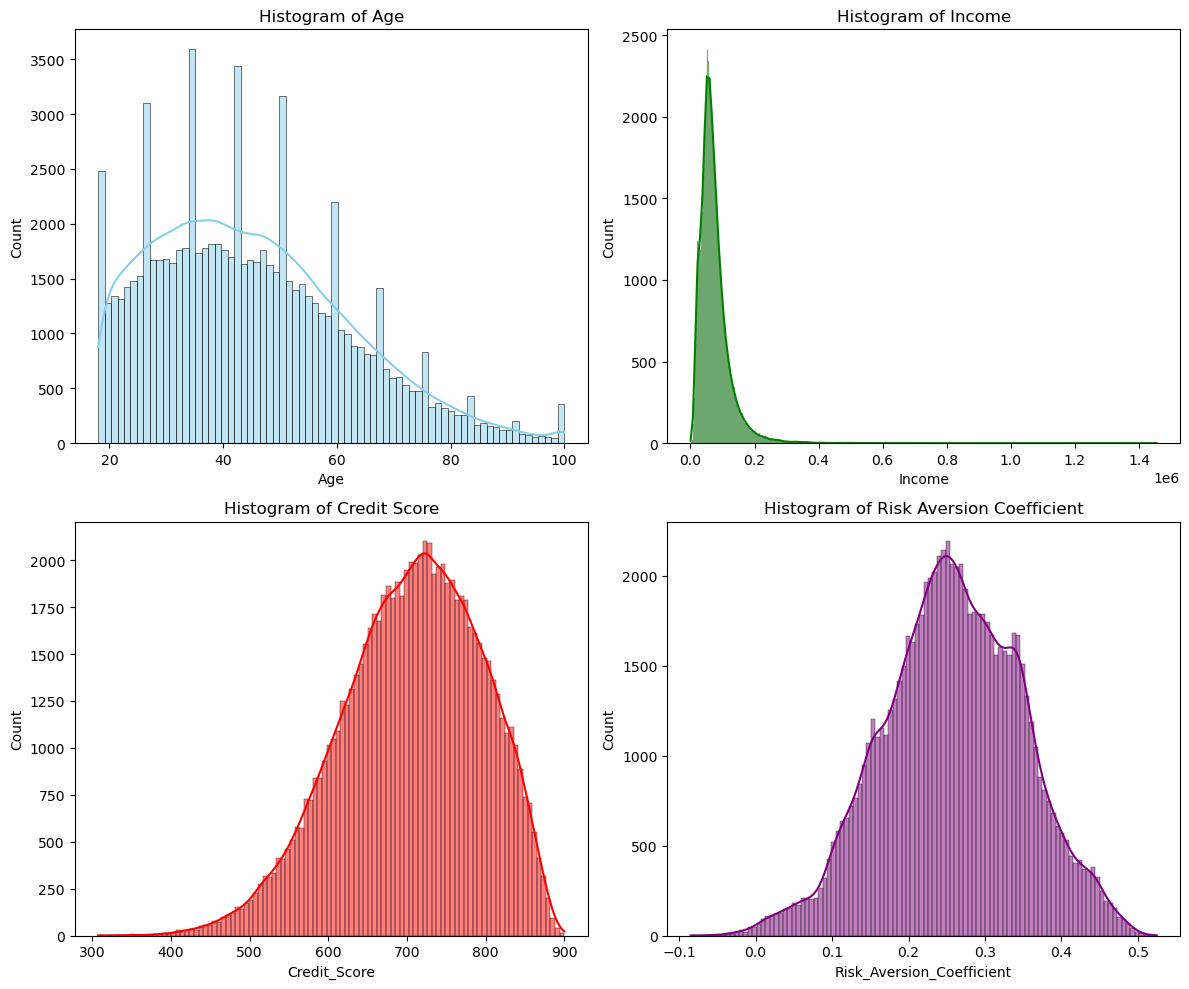

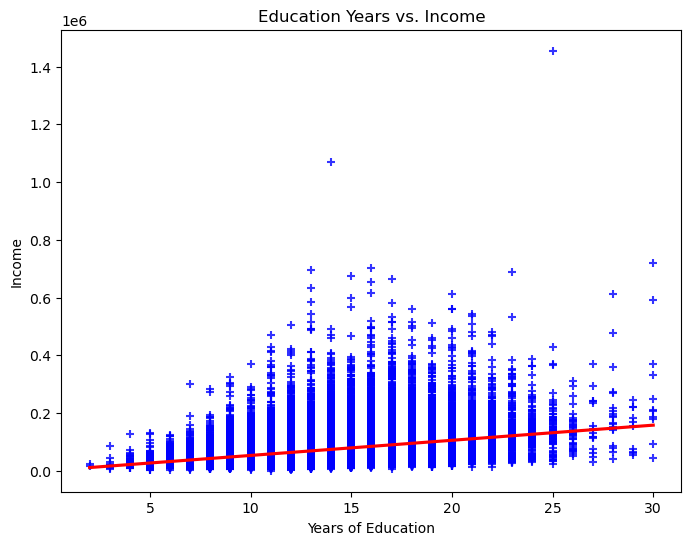

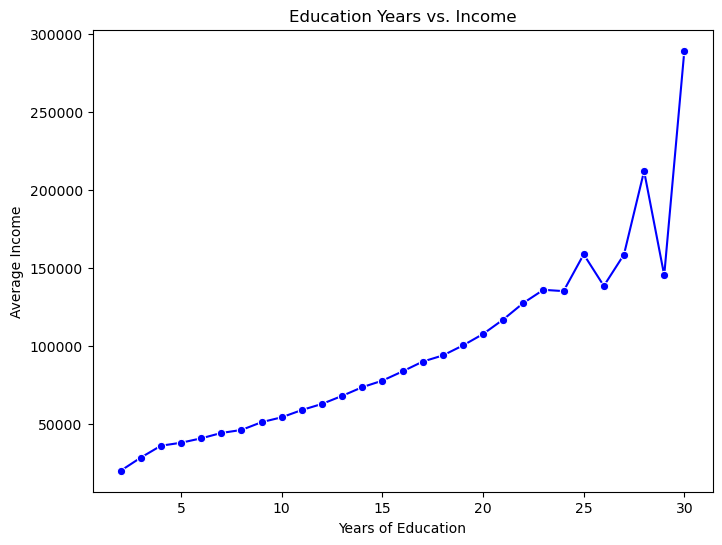

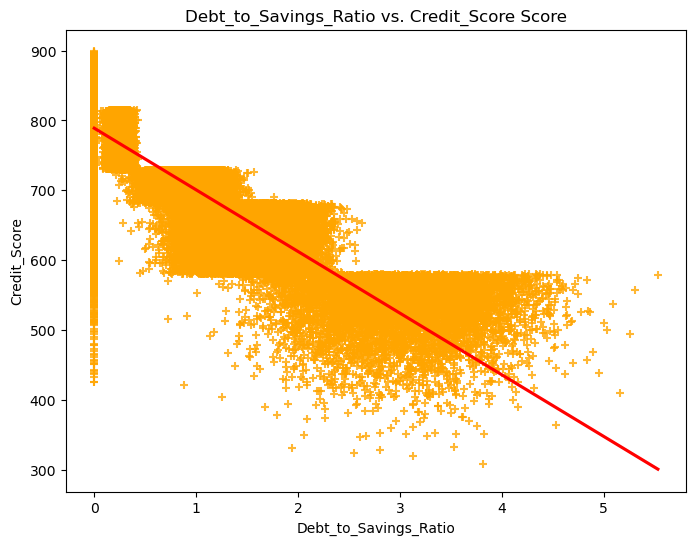

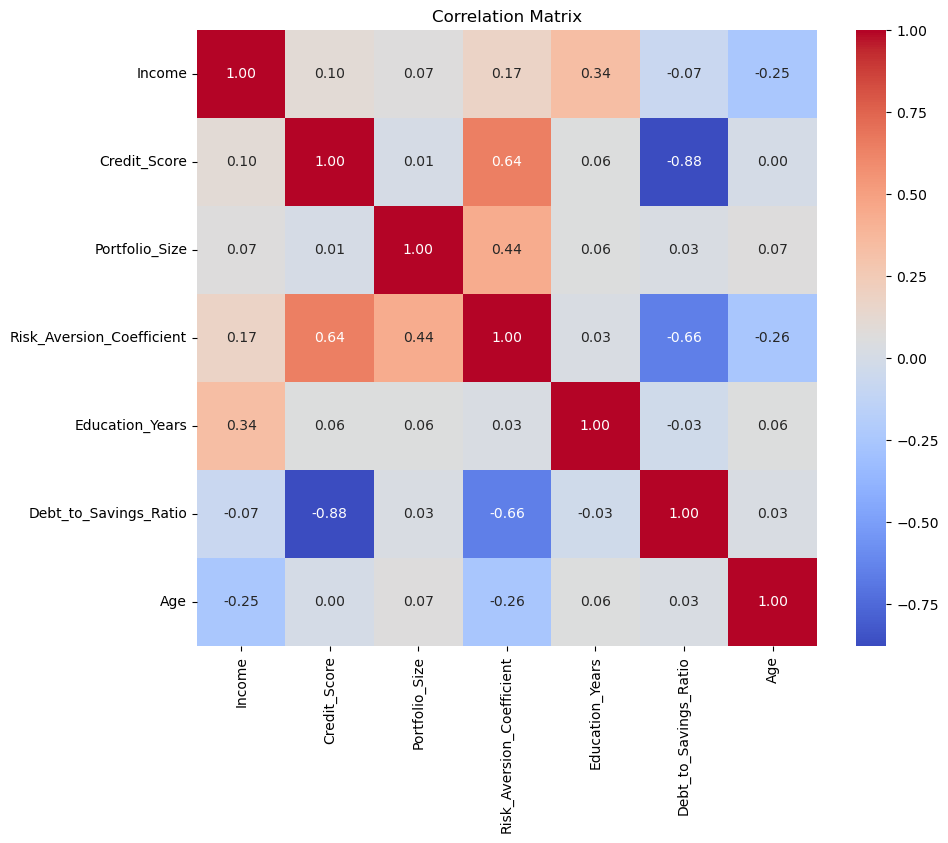

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\Guill\OneDrive\Documents\simulated_bank_data2.csv"



# Histograms of Age, Income, Credit Score, and Risk Aversion Coefficient
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Histogram of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['Income'], kde=True, color='green')
plt.title('Histogram of Income')

plt.subplot(2, 2, 3)
sns.histplot(df['Credit_Score'], kde=True, color='red')
plt.title('Histogram of Credit Score')

plt.subplot(2, 2, 4)
sns.histplot(df['Risk_Aversion_Coefficient'], kde=True, color='purple')
plt.title('Histogram of Risk Aversion Coefficient')

plt.tight_layout()
plt.show()

# Scatter plots to explore relationships

plt.figure(figsize=(8, 6))
sns.regplot(x='Education_Years', y='Income', data=df, color='blue', marker='+', line_kws={"color": "red"})
plt.title('Education Years vs. Income')
plt.xlabel('Years of Education')
plt.ylabel('Income')
plt.show()

grouped_data = df.groupby('Education_Years')['Income'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(x='Education_Years', y='Income', data=grouped_data, marker='o', color='blue')
plt.title('Education Years vs. Income')
plt.xlabel('Years of Education')
plt.ylabel('Average Income')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='Debt_to_Savings_Ratio', y='Credit_Score', data=df, color='orange', marker='+', line_kws={"color": "red"})
plt.title('Debt_to_Savings_Ratio vs. Credit_Score Score')
plt.xlabel('Debt_to_Savings_Ratio')
plt.ylabel('Credit_Score')
plt.show()



# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Income', 'Credit_Score', 'Portfolio_Size', 'Risk_Aversion_Coefficient','Education_Years', 'Debt_to_Savings_Ratio', 'Age']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
